In [1]:
import keras


Using TensorFlow backend.


In [4]:
import tensorflow as tf

In [5]:
from keras.utils.vis_utils import plot_model

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
from keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

In [27]:
# unique_word=8802
max_len=46
num_classes=3

In [9]:
# model = Sequential(name="Model #1")
# model.add(Embedding(unique_word, 256, name="Embedding"))
# model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True, name="LSTM1"))
# model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=False, name="LSTM2"))
# model.add(Dense(100, activation="relu", name="Dense1"))
# model.add(Dropout(0.5, name="Dropout1"))
# model.add(Dense(num_classes, activation="softmax", name="Output"))
# model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.005), metrics=['accuracy'])
# model.summary()

In [3]:
model=keras.models.load_model("/content/drive/My Drive/database_folder/iitdelhi/lstm_model.h5")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


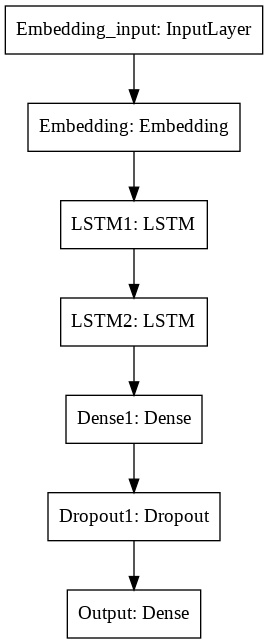

In [10]:
plot_model(model)

In [ ]:
# converter = tf.lite.TFLiteConverter(model)
# tflite_model = converter.convert()
# open("converted_model.tflite", "wb").write(tflite_model)

In [11]:
import pandas as pd
import numpy as np
import flask
from keras.models import load_model
from sklearn.externals import joblib
import tensorflow as tf
import csv
import codecs
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [12]:
app =flask.Flask(__name__)

In [13]:
def define_model():
  global graph
  graph=tf.compat.v1.get_default_graph()
  global model1
  model1=load_model("/content/drive/My Drive/database_folder/iitdelhi/lstm_model.h5")
  return print("model loaded")


In [14]:
define_model()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


model loaded


In [15]:
# for text preprcoessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [16]:
# keras library
from keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

In [17]:
lemmatizer=WordNetLemmatizer()

In [18]:
# data preprocessing
def preprocess(data):
  review=[]
  for cmt  in tqdm(data['text']):
    clean_cmt=re.sub("[^a-zA-Z]", " ",str(cmt))#to remove unnwanted string from text
    words=word_tokenize(clean_cmt.lower())#split sentence into list of words
    lemma_word=[lemmatizer.lemmatize(word) for word in words]
    review.append(lemma_word)
  return(review)

In [19]:
import pickle
with open('/content/drive/My Drive/database_folder/iitdelhi/SentinmentTokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [20]:
def text_to_seq(text,tokenizer):
  return tokenizer.texts_to_sequences(text)

def pad_sequence(seq,max_len):
  return sequence.pad_sequences(seq,max_len)

In [35]:
def custom_test_case(sentence):
  clean_phrase=re.sub("[^a-zA-Z]", " ", sentence)
  words = word_tokenize(clean_phrase.lower())
  lemma_words = [lemmatizer.lemmatize(word) for word in words]
  # print(type(lemma_words))
  # print(lemma_words)
  tt=text_to_seq([lemma_words],tokenizer)
  # print(type(tt))
  # print(tt)
  tt=sequence.pad_sequences(tt,max_len)
  # print(type(tt))
  # print(tt)
  y_temp=model.predict_classes(tt)
  # string p="positive"
  # print('hrlo')
  # print(type(y_temp))
  # print(y_temp[0])
  print("senetence : "+sentence)
  if(y_temp[0]==0):
    return 'positive'
  if(y_temp[0]==1):
    return "negative"
  if(y_temp[0]==2):
    return "neutral"
  # return y_temp  






In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
ck=["this is a beautiful place"]
ck.append("this is a bad place")

In [25]:
import numpy as np

ck2=np.array(ck)

In [36]:
for i in range(len(ck)):
  print(i)
  print("Predicted summary:",custom_test_case(ck[i]))
  print("\n")

0
senetence : this is beautiful place
Predicted summary: positive


1
senetence : this is bad place
Predicted summary: negative


